In [3]:
import os
import random
import shutil

# 원본 데이터 경로
normal_dir = 'processed_data/normal'
kneeup_dir = 'processed_data/abnormal/kneeup'

# 새로운 데이터셋 저장 경로
binary_dataset_dir = 'binary_dataset'
train_dir = os.path.join(binary_dataset_dir, 'train')
val_dir = os.path.join(binary_dataset_dir, 'val')
test_dir = os.path.join(binary_dataset_dir, 'test')

# 기존 폴더 제거 및 새 폴더 생성
if os.path.exists(binary_dataset_dir):
    shutil.rmtree(binary_dataset_dir)
os.makedirs(os.path.join(train_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'kneeup'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'kneeup'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'kneeup'), exist_ok=True)

# `kneeup` 데이터 준비
kneeup_images = os.listdir(kneeup_dir)
random.shuffle(kneeup_images)

# `normal` 데이터에서 `kneeup` 데이터 수만큼 무작위 샘플 추출
normal_images = os.listdir(normal_dir)
random.shuffle(normal_images)
normal_images = normal_images[:len(kneeup_images)]  # `kneeup` 데이터와 같은 개수로 샘플링

# Helper 함수: 데이터를 train/val/test로 나누고 복사
def split_and_copy(images, src_dir, class_name):
    train_split = int(0.6 * len(images))
    val_split = int(0.8 * len(images))
    
    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    # Train
    for img_name in train_images:
        shutil.copy(os.path.join(src_dir, img_name), os.path.join(train_dir, class_name, img_name))
    # Validation
    for img_name in val_images:
        shutil.copy(os.path.join(src_dir, img_name), os.path.join(val_dir, class_name, img_name))
    # Test
    for img_name in test_images:
        shutil.copy(os.path.join(src_dir, img_name), os.path.join(test_dir, class_name, img_name))

# `normal` 데이터 나누기
split_and_copy(normal_images, normal_dir, 'normal')

# `kneeup` 데이터 나누기
split_and_copy(kneeup_images, kneeup_dir, 'kneeup')


In [4]:
import tensorflow as tf

# 데이터셋 경로
train_dir = 'binary_dataset/train'
val_dir = 'binary_dataset/val'
test_dir = 'binary_dataset/test'

# 데이터 로드
img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)


2024-11-29 20:25:52.600432: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-29 20:25:52.601089: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 20:25:52.604487: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 20:25:52.614081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732879552.629973  484891 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732879552.63

Found 142 files belonging to 2 classes.
Found 48 files belonging to 2 classes.
Found 48 files belonging to 2 classes.


W0000 00:00:1732879572.657112  484891 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 142 files belonging to 2 classes.
클래스 이름: ['kneeup', 'normal']


/home/sys03202001/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sys03202001/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


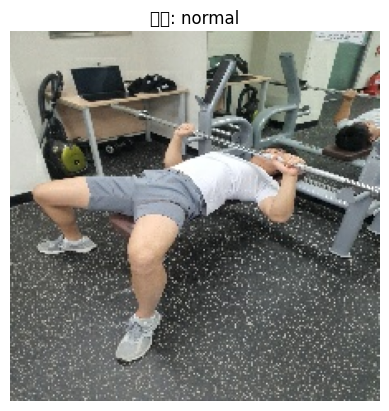

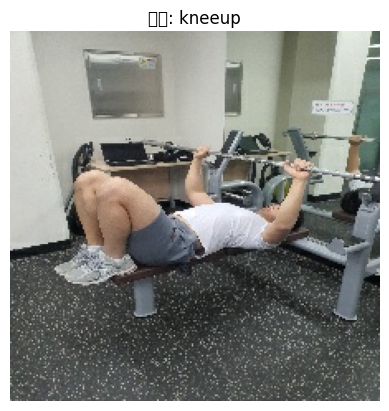

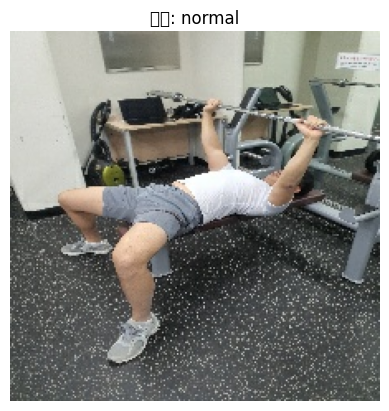

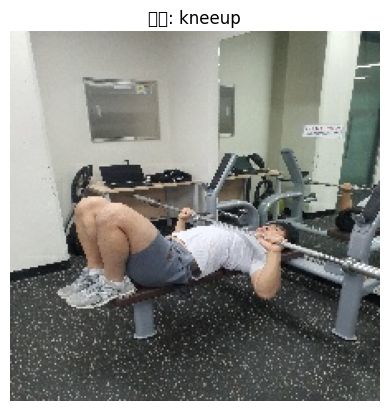

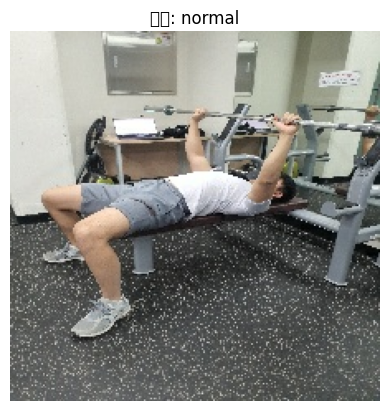

2024-11-29 20:27:02.752845: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터셋 경로
train_dir = 'binary_dataset/train'

# 데이터 로드
img_size = (224, 224)
batch_size = 5  # 5개씩만 가져오기

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# 클래스 이름 출력
print(f"클래스 이름: {train_ds.class_names}")

# 첫 번째 배치에서 이미지와 라벨 가져오기
for images, labels in train_ds.take(1):  # 첫 배치만 가져옴
    for i in range(5):  # 배치 내 5개 이미지를 확인
        plt.figure()
        plt.imshow(images[i].numpy().astype("uint8"))  # 이미지 출력
        class_name = train_ds.class_names[tf.argmax(labels[i]).numpy()]
        plt.title(f"라벨: {class_name}")  # 라벨 출력
        plt.axis("off")
        plt.show()


In [6]:
# 모델 정의
kneeup_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 두 클래스: normal, kneeup
])

# 모델 컴파일
kneeup_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 학습
history = kneeup_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# 테스트 데이터로 평가
test_loss, test_accuracy = kneeup_model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10


/home/sys03202001/.local/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6386 - loss: 5.6282 - val_accuracy: 0.9167 - val_loss: 0.1747
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9363 - loss: 0.1344 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 1.0000 - loss: 8.1632e-04 - val_accuracy: 0.9792 - val_loss: 0.0173
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 1.0000 - loss: 2.4044e-04 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 1.4500e-04 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 5.9948e-05 - val_accuracy: 1.0000 - val_loss: 0.0140
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 1.0000 - loss: 3.0803e-05 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 1.0000 - loss: 1.8533e-05 - val_accurac

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0).argmax(axis=1)
y_pred = kneeup_model.predict(test_ds).argmax(axis=1)

# Confusion Matrix와 Classification Report 출력
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_ds.class_names))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Confusion Matrix:
[[14 10]
 [10 14]]
Classification Report:
              precision    recall  f1-score   support

      kneeup       0.58      0.58      0.58        24
      normal       0.58      0.58      0.58        24

    accuracy                           0.58        48
   macro avg       0.58      0.58      0.58        48
weighted avg       0.58      0.58      0.58        48



# data augmentation

In [10]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# 원본 및 저장 경로 설정
input_dir = 'processed_data/abnormal/kneeup'
output_dir = 'augmented_data/kneeup'
os.makedirs(output_dir, exist_ok=True)

# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=30,         # 최대 30도 회전
    width_shift_range=0.2,     # 가로 이동 (이미지 크기의 20%)
    height_shift_range=0.2,    # 세로 이동 (이미지 크기의 20%)
    shear_range=0.2,           # 이미지 왜곡
    zoom_range=0.2,            # 확대/축소
    horizontal_flip=True,      # 좌우 반전
    fill_mode='nearest'        # 빈 픽셀 채우기
)

# 원본 데이터 증강
images = os.listdir(input_dir)
for img_name in images:
    img_path = os.path.join(input_dir, img_name)
    img = load_img(img_path)  # 이미지 로드
    img_array = img_to_array(img)  # NumPy 배열로 변환
    img_array = img_array.reshape((1,) + img_array.shape)  # 배치 차원 추가

    # 증강된 이미지 저장
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1,
                                           save_to_dir=output_dir,
                                           save_prefix='aug',
                                           save_format='jpeg')):
        if i >= 19:  # 이미지당 20개의 증강 이미지 생성
            break


In [11]:
import os
import shutil

# 원본 및 증강 데이터 경로
original_dir = 'processed_data/abnormal/kneeup'
augmented_dir = 'augmented_data/kneeup'
new_dataset_dir = 'merged_data/kneeup'

# 새 데이터셋 폴더 생성
os.makedirs(new_dataset_dir, exist_ok=True)

# 원본 데이터 복사
for img_name in os.listdir(original_dir):
    shutil.copy(os.path.join(original_dir, img_name), os.path.join(new_dataset_dir, img_name))

# 증강 데이터 복사
for img_name in os.listdir(augmented_dir):
    shutil.copy(os.path.join(augmented_dir, img_name), os.path.join(new_dataset_dir, img_name))

print(f"새 데이터셋 생성 완료: {new_dataset_dir}")


새 데이터셋 생성 완료: merged_data/kneeup


In [13]:
import os

# 증강 데이터 경로
augmented_dir = 'merged_data'

# 이미지 파일 개수 계산 함수
def count_images_in_dir(directory):
    total_count = 0
    for root, dirs, files in os.walk(directory):  # 하위 디렉토리까지 탐색
        image_count = len([file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        total_count += image_count
        print(f"{root} - {image_count} images")
    return total_count

# 전체 이미지 개수 출력
total_images = count_images_in_dir(augmented_dir)
print(f"Total images in '{augmented_dir}': {total_images}")


merged_data - 0 images
merged_data/kneeup - 2218 images
Total images in 'merged_data': 2218


In [17]:
import os
import random
import shutil

# 데이터 경로 설정
normal_dir = 'processed_data/normal'
kneeup_dir = 'augmented_data/kneeup'

# 새 데이터셋 경로
binary_dataset_dir = 'binary_dataset_balanced'
train_dir = os.path.join(binary_dataset_dir, 'train')
val_dir = os.path.join(binary_dataset_dir, 'val')
test_dir = os.path.join(binary_dataset_dir, 'test')

# 기존 폴더 제거 및 새 폴더 생성
if os.path.exists(binary_dataset_dir):
    shutil.rmtree(binary_dataset_dir)
os.makedirs(os.path.join(train_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'kneeup'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'kneeup'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'kneeup'), exist_ok=True)

# `kneeup` 데이터 준비
kneeup_images = os.listdir(kneeup_dir)
random.shuffle(kneeup_images)
kneeup_images = kneeup_images[:1200]  # 1200개만 사용

# `normal` 데이터 무작위 샘플링
normal_images = os.listdir(normal_dir)
random.shuffle(normal_images)
normal_images = normal_images[:1200]  # 1200개 샘플링

# Helper 함수: 데이터를 train/val/test로 나누고 복사
def split_and_copy(images, src_dir, class_name):
    train_split = int(0.6 * len(images))
    val_split = int(0.8 * len(images))
    
    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    # Train
    for img_name in train_images:
        shutil.copy(os.path.join(src_dir, img_name), os.path.join(train_dir, class_name, img_name))
    # Validation
    for img_name in val_images:
        shutil.copy(os.path.join(src_dir, img_name), os.path.join(val_dir, class_name, img_name))
    # Test
    for img_name in test_images:
        shutil.copy(os.path.join(src_dir, img_name), os.path.join(test_dir, class_name, img_name))

# `normal` 데이터 나누기
split_and_copy(normal_images, normal_dir, 'normal')

# `kneeup` 데이터 나누기
split_and_copy(kneeup_images, kneeup_dir, 'kneeup')


In [18]:
import tensorflow as tf

# 데이터셋 경로
train_dir = 'binary_dataset_balanced/train'
val_dir = 'binary_dataset_balanced/val'
test_dir = 'binary_dataset_balanced/test'

# 데이터 로드
img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)


Found 1440 files belonging to 2 classes.
Found 480 files belonging to 2 classes.
Found 480 files belonging to 2 classes.


In [19]:
from tensorflow.keras import layers, models

# 모델 정의
binary_balanced_model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 두 클래스: normal, kneeup
])

# 모델 컴파일
binary_balanced_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 학습
history = binary_balanced_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# 테스트 데이터로 평가
test_loss, test_accuracy = binary_balanced_model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/10


/home/sys03202001/.local/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.6852 - loss: 2.1925 - val_accuracy: 0.9979 - val_loss: 0.0067
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 6.3403e-04
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 1.0000 - loss: 2.3994e-04 - val_accuracy: 1.0000 - val_loss: 4.7520e-04
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 1.0000 - loss: 1.1996e-04 - val_accuracy: 1.0000 - val_loss: 4.1584e-04
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 1.0000 - loss: 1.1965e-04 - val_accuracy: 1.0000 - val_loss: 3.5109e-04
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 1.0000 - loss: 6.4274e-05 - val_accuracy: 1.0000 - val_loss: 2.8158e-04
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 1.0000 - loss: 4.9269e-05 - val_accuracy: 1.0000 - val_loss: 2.3203e-04
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 1.0000 

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 실제 라벨 (y_true) 추출
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0).argmax(axis=1)

# 모델의 예측값 (y_pred) 생성
y_pred = binary_balanced_model.predict(test_ds).argmax(axis=1)

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report 생성
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_ds.class_names))


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Confusion Matrix:
[[125 115]
 [116 124]]
Classification Report:
              precision    recall  f1-score   support

      kneeup       0.52      0.52      0.52       240
      normal       0.52      0.52      0.52       240

    accuracy                           0.52       480
   macro avg       0.52      0.52      0.52       480
weighted avg       0.52      0.52      0.52       480



In [25]:
# Test Set의 배치당 샘플 확인
for images, labels in test_ds.take(1):  # 첫 번째 배치만 확인
    print(f"이미지 형태: {images.shape}")
    print(f"라벨: {labels.numpy()}")

# 각 클래스별로 몇 개의 샘플이 있는지 확인
class_counts = {}
for _, labels in test_ds:
    for label in labels.numpy():
        label_idx = np.argmax(label)
        class_counts[label_idx] = class_counts.get(label_idx, 0) + 1

print(f"클래스별 샘플 수: {class_counts}")
print(f"클래스 이름: {test_ds.class_names}")

이미지 형태: (32, 224, 224, 3)
라벨: [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
클래스별 샘플 수: {np.int64(0): 240, np.int64(1): 240}
클래스 이름: ['kneeup', 'normal']


In [26]:
import os
import shutil
import random

input_dir = 'processed_data'  # 원본 데이터 폴더
test_dir = 'clean_test_set'  # 증강 없는 Test Set 폴더
categories = ['normal', 'kneeup']  # 테스트할 클래스

# 테스트 데이터 재구성
os.makedirs(test_dir, exist_ok=True)

for category in categories:
    class_path = os.path.join(input_dir, category)
    test_class_path = os.path.join(test_dir, category)
    os.makedirs(test_class_path, exist_ok=True)
    
    images = os.listdir(class_path)
    random.shuffle(images)
    
    # Test Set에 일정 비율로 데이터 복사
    test_images = images[:int(len(images) * 0.2)]  # 예: 전체 데이터의 20%
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_class_path, img))


FileNotFoundError: [Errno 2] No such file or directory: 'processed_data/kneeup'